In [2]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree, ensemble

import numpy as np
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
digits = datasets.load_digits()

In [5]:
X = digits.data
y = digits.target

In [6]:
X.shape

(1797, 64)

In [7]:
dtree = tree.DecisionTreeClassifier()

In [9]:
cv_size = 10
tree_scores = model_selection.cross_val_score(dtree, X, y, cv=cv_size)

In [10]:
ans1 = tree_scores.mean()
ans1

0.8324891371818746

In [11]:
def plot_scores(scores):
    pylab.grid(True)
    pylab.plot(range(cv_size), scores, label='cv scores')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc='lower right')

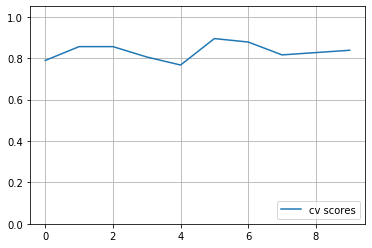

In [12]:
plot_scores(tree_scores)

In [14]:
bagging = ensemble.BaggingClassifier(dtree, n_estimators=100)
bag_scores = model_selection.cross_val_score(bagging, X, y, cv=cv_size)

0.9287274984481687

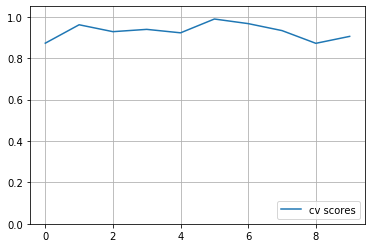

In [15]:
plot_scores(bag_scores)
ans2 = bag_scores.mean()
ans2

0.9321042830540037

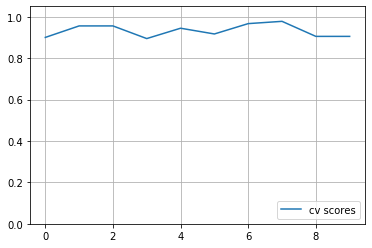

In [17]:
n_f = int(np.sqrt(X.shape[1]))
bagging2 = ensemble.BaggingClassifier(dtree, n_estimators=100, max_features=n_f)
bag_scores = model_selection.cross_val_score(bagging2, X, y, cv=cv_size)

plot_scores(bag_scores)
ans3 = bag_scores.mean()
ans3

0.9487957790192427

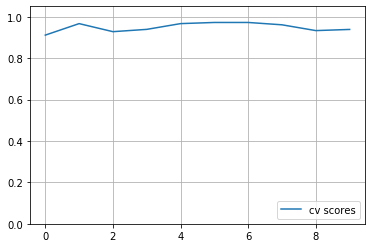

In [19]:
tree_f = tree.DecisionTreeClassifier(max_features=n_f)
bagging3 = ensemble.BaggingClassifier(tree_f, n_estimators=100)
bag_scores = model_selection.cross_val_score(bagging3, X, y, cv=cv_size)

plot_scores(bag_scores)
ans4 = bag_scores.mean()
ans4

In [22]:
%%time

n_trees = [1] + list(range(5,100,5))
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, X, y, 
                                             scoring = 'accuracy', cv = cv_size)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 30.3 s, sys: 115 ms, total: 30.4 s
Wall time: 30.4 s


In [23]:
scoring

matrix([[0.78888889, 0.77777778, 0.76111111, 0.67222222, 0.62777778,
         0.73333333, 0.79444444, 0.76536313, 0.7150838 , 0.69273743],
        [0.86666667, 0.91666667, 0.89444444, 0.9       , 0.84444444,
         0.9       , 0.92222222, 0.90502793, 0.87709497, 0.83798883],
        [0.9       , 0.95555556, 0.89444444, 0.9       , 0.91111111,
         0.95555556, 0.95555556, 0.9273743 , 0.92178771, 0.89944134],
        [0.92222222, 0.95555556, 0.89444444, 0.91111111, 0.95555556,
         0.95      , 0.96111111, 0.93854749, 0.89944134, 0.89944134],
        [0.92222222, 0.96111111, 0.90555556, 0.93333333, 0.95      ,
         0.96111111, 0.97777778, 0.94972067, 0.90502793, 0.92178771],
        [0.93333333, 0.96666667, 0.91666667, 0.93333333, 0.95555556,
         0.95555556, 0.98888889, 0.94413408, 0.89944134, 0.9273743 ],
        [0.93333333, 0.97222222, 0.91666667, 0.93333333, 0.95      ,
         0.94444444, 0.97777778, 0.94413408, 0.90502793, 0.92178771],
        [0.93888889, 0.9722

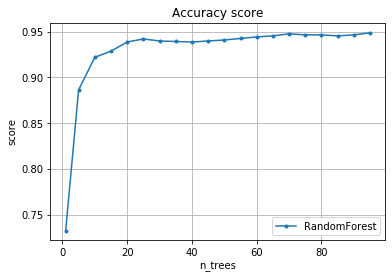

In [24]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [26]:
%%time
total_features = X.shape[1]
n_features = np.arange(0.1,1.1,0.1)
scoring = []
for n_feature in n_features:
    n_feat = int(n_feature*total_features)
    estimator = ensemble.RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=1, max_features=n_feat)
    score = model_selection.cross_val_score(estimator, X, y, 
                                             scoring = 'accuracy', cv = cv_size)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 36.2 s, sys: 91.6 ms, total: 36.3 s
Wall time: 36.3 s


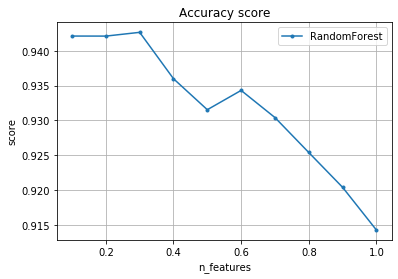

In [27]:
pylab.plot(n_features, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_features')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='upper right')

In [29]:
estimator1 = ensemble.RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=1, max_depth=5)
estimator2 = ensemble.RandomForestClassifier(n_estimators = 50, min_samples_split=5, random_state=1)

score1 = model_selection.cross_val_score(estimator1, X, y, scoring = 'accuracy', cv = cv_size) 
score2 = model_selection.cross_val_score(estimator2, X, y, scoring = 'accuracy', cv = cv_size)

score1.mean()
score2.mean()

0.9409807572936064